## Investigation Overview
This notebook Visualizes the loan data from Prosper.The  main goal here is to visualize various relationships among the factors that are affecting the APR and the loanamount

## Dataset overview
This notebook analyzes the loan data from Prosper.This data set contains 113,937 loans with 81 variables for each loan that has been issued.We will be analyzing the various factors that are affecting the loan status and vizualize the relationship between various variables.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display
%matplotlib inline

In [3]:
loan_data=pd.read_csv('data/prosperLoanData.csv')
display(loan_data.columns)
display(loan_data.info())

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

None

## Distribution of Borrower APR

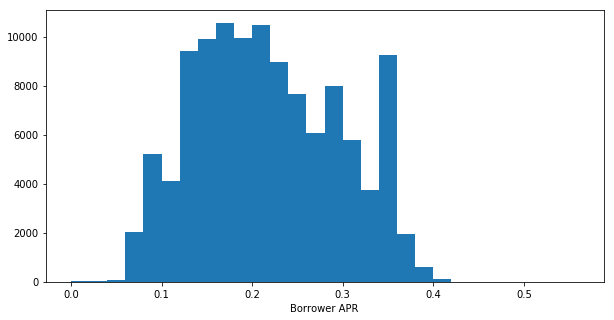

In [4]:
bins = np.arange(0, loan_data['BorrowerAPR'].max()+0.05, 0.02)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

## Distribution of Loan original amount

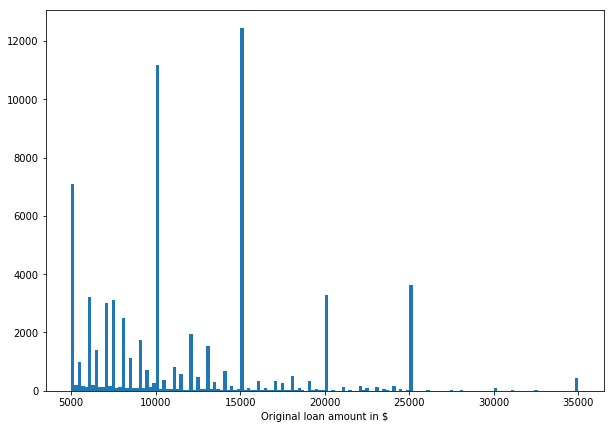

In [11]:
bins_LoanAmount = np.arange(5000, loan_data['LoanOriginalAmount'].max()+200, 200)
plt.figure(figsize=[10, 7])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins_LoanAmount);
plt.xlabel('Original loan amount in $');

## ProsperRating (Alpha) vs BorrowerAPR

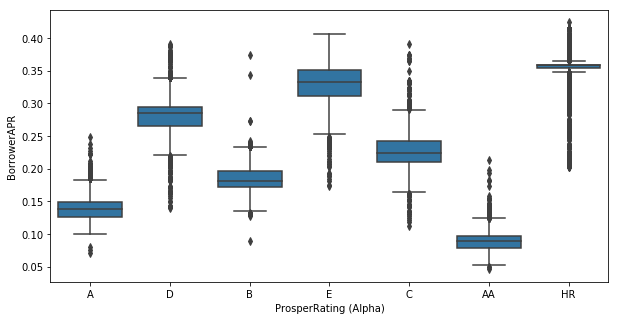

In [12]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = loan_data, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', color = base_color)

It looks like BorrowerAPR significantly differs with ProsperRating (Alpha), Borrower APR for poor ProsperRating (Alpha) seems to be very high when compared with borrowerAPR for good ProsperRating (Alpha)

## ProsperRating (Alpha) vs LoanOriginalamount

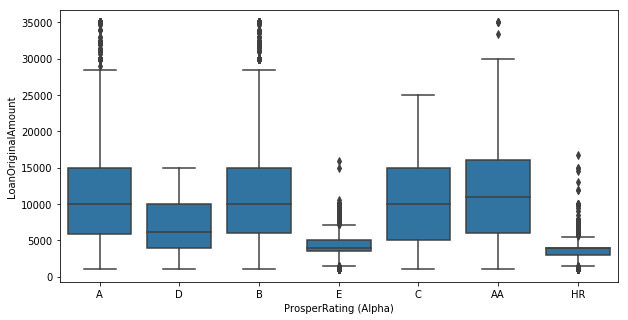

In [7]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = loan_data, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', color = base_color)

It looks like LoanOriginalAmount significantly differs with ProsperRating (Alpha), Average loan amount for poor ProsperRating (Alpha) seems to be very low when compared with Loan amounts for ProsperRating (Alpha).

## ProsperRating (Alpha),  EmploymentStatus vs Term 

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 <a list of 6 Text xticklabel objects>)

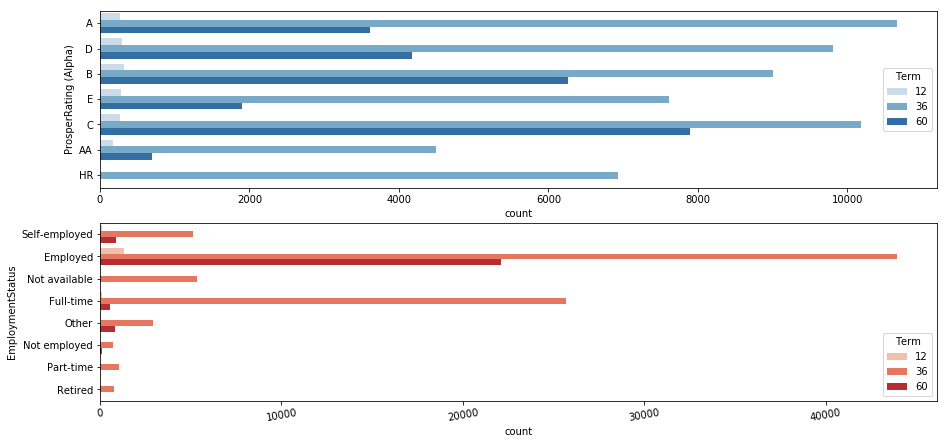

In [9]:
plt.figure(figsize = [15, 15])
base_color = sb.color_palette()[0]
plt.subplot(4, 1, 1)
sb.countplot(data = loan_data, y = 'ProsperRating (Alpha)', hue = 'Term', palette ='Blues')
ax = plt.subplot(4, 1, 2)
sb.countplot(data = loan_data, y = 'EmploymentStatus', hue = 'Term',palette ='Reds')
plt.xticks(rotation=10)

When we look at the relationship between term and prosper rating we can see that people overall are preferring 36 month term loan but intrestingly people  with B and C ratings have more 60 month when compared to rest of the ratings. Employed and full time people  are opting for 36 month loan but we do not enough data on  other, not employed , part time and retired categories to determine a conclusive result, their data seems to be less to arrive at a conclusion

## ProsperRating (Alpha) Vs LoanOriginalAmount,BorrowerAPR

C:\Users\rpalavarapu\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


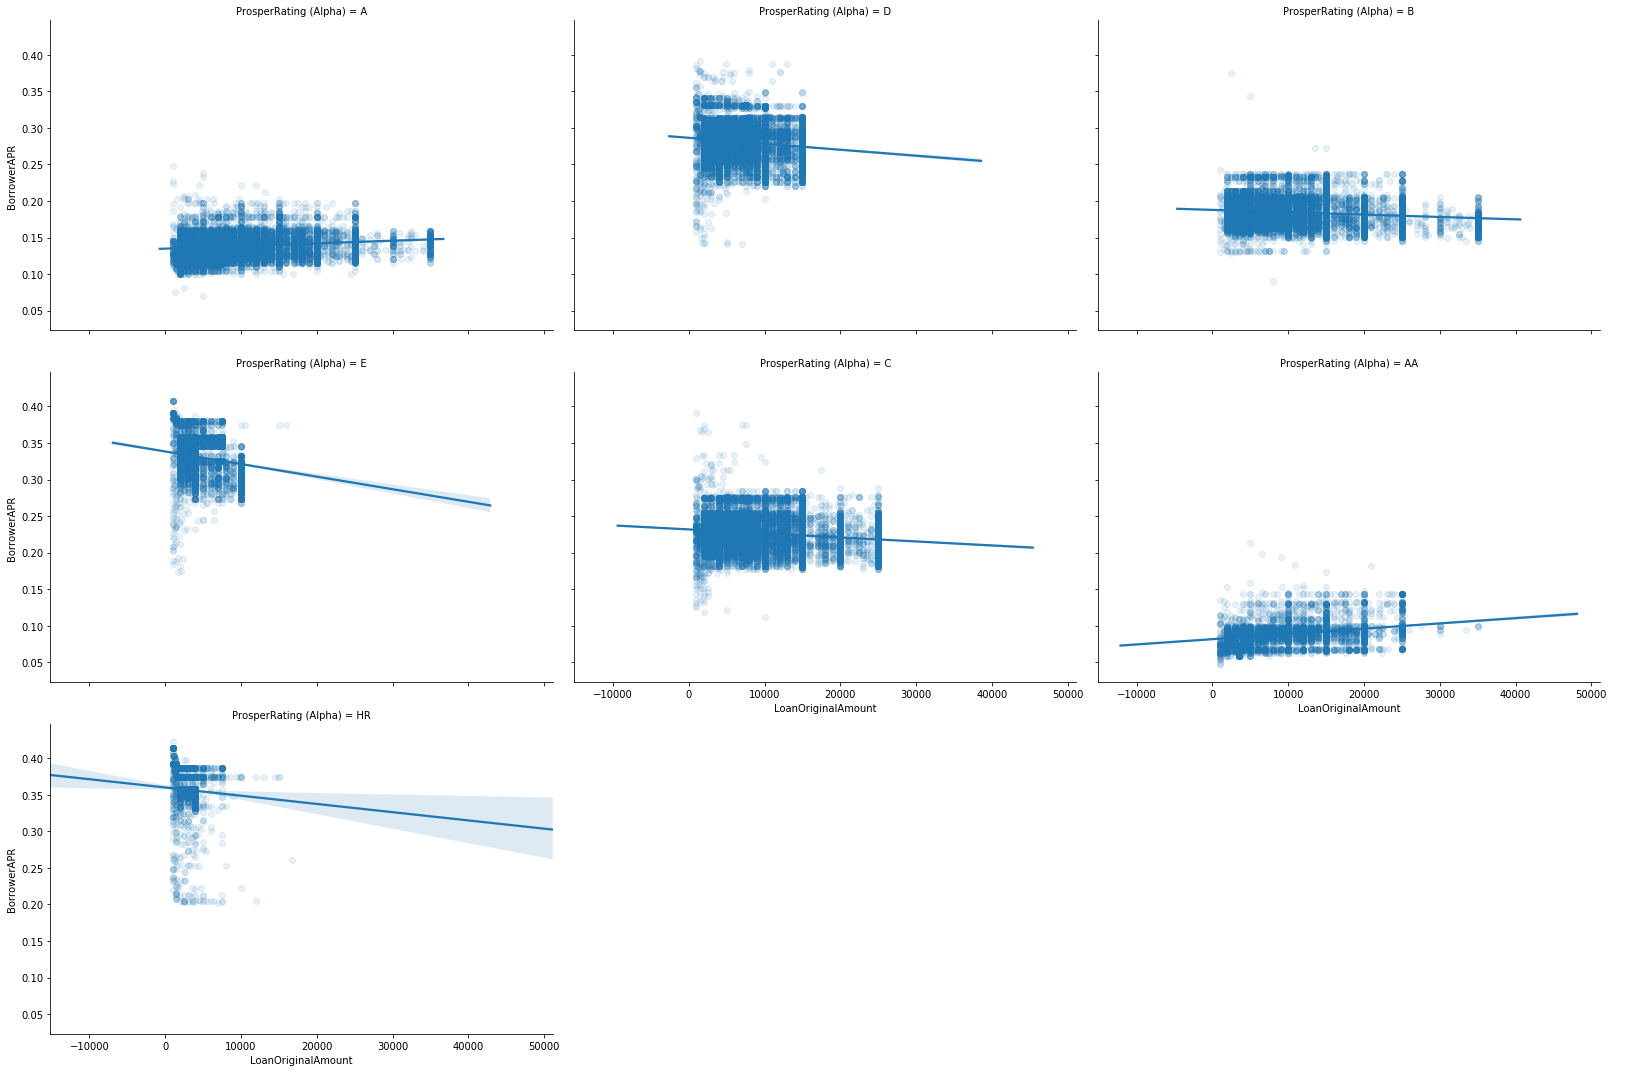

In [10]:
g=sb.FacetGrid(data=loan_data, aspect=1.5, height=5, col='ProsperRating (Alpha)',col_wrap=3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.03, scatter_kws={'alpha':0.1});
g.add_legend();

It looks like the loan amount increases with better prosper rating.Looking at the above Grid closely it looks like people with better prosper rating tend to borrow more because they might be getting a good APR and people with less propser rating tend to borrow less due to high APR